In [3]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, precision_score, recall_score,
                             roc_auc_score, roc_curve)

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Step 2: Load dataset
df = pd.read_csv("Iris.csv")

In [6]:
# Step 3: Initial Inspection
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [7]:
# Drop the 'Id' column as it's not useful
df.drop('Id', axis=1, inplace=True)

In [8]:
# Separate features and labels
X = df.drop('Species', axis=1)
y = df['Species']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

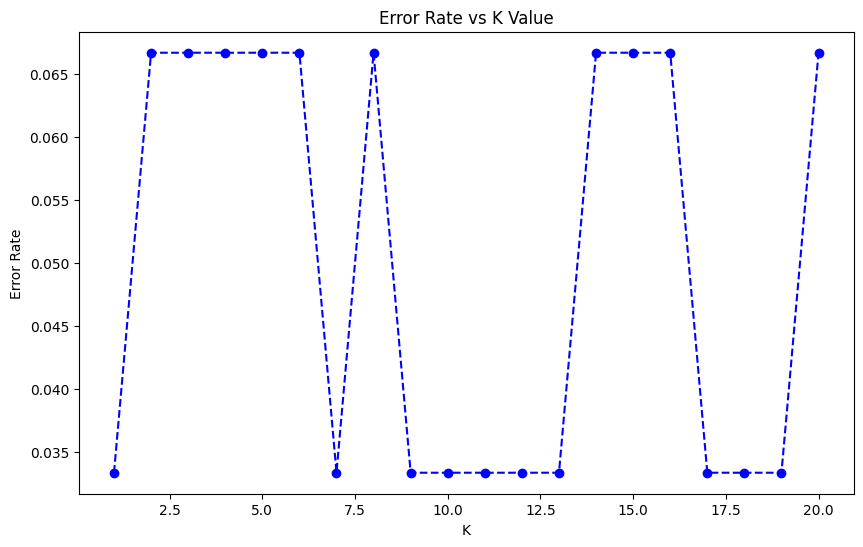

In [12]:
from sklearn.neighbors import KNeighborsClassifier

error_rates = []
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error = np.mean(pred_k != y_test)
    error_rates.append(error)

# Plot K vs Error
plt.figure(figsize=(10,6))
plt.plot(k_range, error_rates, color='blue', linestyle='dashed', marker='o')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


In [13]:
# Choose optimal K (e.g., based on the lowest error)
optimal_k = error_rates.index(min(error_rates)) + 1
print(f"Optimal K is: {optimal_k}")

# Train the model
model = KNeighborsClassifier(n_neighbors=optimal_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Optimal K is: 1
Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [15]:
from sklearn.preprocessing import LabelEncoder

# Use PetalLengthCm and PetalWidthCm for visualization
X_viz = df[['PetalLengthCm', 'PetalWidthCm']]
y_viz = df['Species']

In [16]:
# Encode target labels to integers
label_encoder = LabelEncoder()
y_viz_encoded = label_encoder.fit_transform(y_viz)

In [17]:
# Standardize the features
X_viz_scaled = StandardScaler().fit_transform(X_viz)

# Split for training visualization model
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(
    X_viz_scaled, y_viz_encoded, test_size=0.2, random_state=42, stratify=y_viz_encoded)

In [18]:
# Train KNN
knn_viz = KNeighborsClassifier(n_neighbors=optimal_k)
knn_viz.fit(X_train_v, y_train_v)

# Create mesh
h = 0.02
x_min, x_max = X_viz_scaled[:, 0].min() - 1, X_viz_scaled[:, 0].max() + 1
y_min, y_max = X_viz_scaled[:, 1].min() - 1, X_viz_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

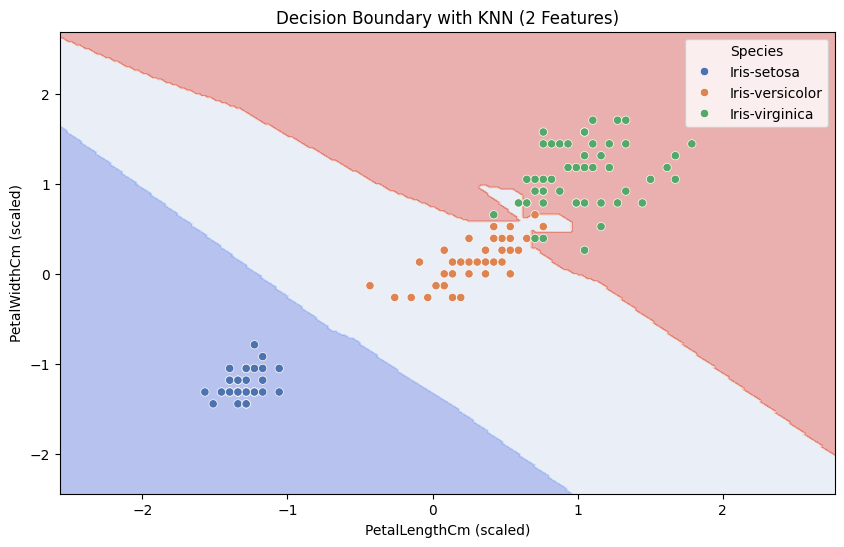

In [19]:
# Predict using mesh grid points
Z = knn_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)

# Overlay original points (use decoded labels for legend)
sns.scatterplot(
    x=X_viz_scaled[:, 0],
    y=X_viz_scaled[:, 1],
    hue=y_viz,
    palette='deep'
)

plt.xlabel('PetalLengthCm (scaled)')
plt.ylabel('PetalWidthCm (scaled)')
plt.title('Decision Boundary with KNN (2 Features)')
plt.show()